In [2]:
#%%
import os
import shutil
import random
from site import execsitecustomize
import numpy as np
import pandas as pd
import sys

from datetime import datetime

import math

import matplotlib.pyplot as plt
import csv
import re

import seaborn as sns



import imageio
import matplotlib.cm as cm
import matplotlib.animation as animation



## Video rendering:
def makeVid(imgList, outpath, fps = 2):
    frames = [] # for storing the generated images
    fig = plt.figure()
    for i in range(len(imgList)):
        frames.append([plt.imshow(imgList[i], cmap=cm.Greys_r,animated=True)])

    anim = animation.ArtistAnimation(fig, frames, interval=50, blit=True,
                                    repeat_delay=1000)
    

    f = os.path.normpath(f'{outpath}.mp4')
    writergif = animation.PillowWriter(fps=fps) 
    writervideo = animation.FFMpegWriter(fps=fps) 
    # anim.save(f, writer=writergif)
    # anim.save(f)
    anim.save(f, writer=writervideo)
    plt.close() 
    return


def approxIndexRow(df, approxIndex):
    return abs(df.index.to_series()-approxIndex).idxmin()

# Heatmap view

In [5]:
dirList = os.listdir('.')
folders = [f for f in dirList if os.path.isdir(f)]
sims = [f for f in folders if f.startswith('T')]
sims.sort()
print(sims)

['T0.7_r20_d6_v1.1', 'T0.7_r20_d3_v1.1', 'T0.7_r20_d5_v1.1', 'T0.7_r20_d4_v1.1', 'T0.7_r20_d2_v1.1']


In [ ]:
#####  HEATMAP VIEW

# folder = "_oldRuns/T0.7_r12_d2" # TESTCASE, functional
# folder = "T0.7_r6_d6"
folder = "T0.7_r20_d2_v1.1"

dirList = os.listdir(folder)
scalarSamples = [f for f in dirList if 'CylindricSampling' in f]
# print(dirList)
if len(scalarSamples) == 0:
    print(f'no relevant files found in folder {folder}.')
else:
    fig, ax = plt.subplots()
    scalarSamples = sorted(scalarSamples)
    maxTimeStep =  int(re.findall(r'\d+', scalarSamples[-1])[0])
    
    print(f'----------')
    print(f"folder: {folder}")
    print(f'max timestep = {maxTimeStep}')
    print(f'---')
    for sample in scalarSamples:
        # sample = scalarSamples[-1]
        timeStep = int(re.findall(r'\d+', sample)[0]) 

        samplePath = os.path.join(folder, sample)
        sampledf = pd.read_csv(samplePath, delimiter='\s+')
        #  height,  radius, numParts, rho, T,   ekin, p,  T_r,   T_y, T_t,   v_r,   v_y, v_t, p_r, p_y,     p_t, numSamples

        heatmapDF = sampledf.pivot(index='radius', columns='height', values='rho')
        heatmapUpper = heatmapDF.copy(deep = True).iloc[::-1]
        # heatmapUpper = heatmapUpper.drop(min(heatmapUpper.index))
        symHeatmap = pd.concat([heatmapUpper, heatmapDF])
        print(f't = {timeStep}')
        ax = sns.heatmap(symHeatmap,annot=True, square=True,vmin=0, vmax=1.4)
        ax.set_title(f'quasi-2D desity heatmap, t = {timeStep}')
        plt.show()
        
        # sampledf[sampledf["radius"]<2].plot(x="height", y="rho", ax=ax, c=plt.cm.viridis(timeStep/ maxTimeStep))
        # ax.get_legend().remove()




# Central Line visualization
 WIP: Compelte overhaul (usign coalescenceSampling) needed!

In [348]:
dirList = os.listdir('.')
folders = [f for f in dirList if os.path.isdir(f)]
sims = [f for f in folders if f.startswith('T')]
sims.sort()
print(sims)

['T0.7_r20_d2_v1.1', 'T0.7_r20_d2_v2.2', 'T0.7_r20_d3_v1.1', 'T0.7_r20_d3_v2.2', 'T0.7_r20_d4_v1.1', 'T0.7_r20_d4_v2.2', 'T0.7_r20_d5_v1.1', 'T0.7_r20_d5_v2.2', 'T0.7_r20_d6_v1.1', 'T0.7_r20_d6_v2.2']


------------------
directory: T0.7_r20_d2_v1.1
T0.7_r20_d2_v1.1: rhoLiq  = 0.7901323162790699, rhoVap = 0.007518000921926904, rhoGibbs = 0.3988251586004984
------------------
directory: T0.7_r20_d2_v2.2
T0.7_r20_d2_v2.2: rhoLiq  = 0.7952350469269103, rhoVap = 0.007039479144518272, rhoGibbs = 0.4011372630357143
------------------
directory: T0.7_r20_d3_v1.1


/tmp/ipykernel_6287/748877700.py:35: FutureWarning: The 'axis' keyword in DataFrame.rolling is deprecated and will be removed in a future version. Call the method without the axis keyword instead.
  rhoDF_rolling = rhoDF.rolling(window = 20, center = True, axis='rows').mean()
/tmp/ipykernel_6287/748877700.py:40: FutureWarning: The 'axis' keyword in DataFrame.rolling is deprecated and will be removed in a future version. Call the method without the axis keyword instead.
  rhoDF_rolling = rhoDF.rolling(window = 3, center = True, axis='rows').mean()
/tmp/ipykernel_6287/748877700.py:69: FutureWarning: The 'axis' keyword in DataFrame.rolling is deprecated and will be removed in a future version. Call the method without the axis keyword instead.
  rhoDF_rolling = rhoDF.rolling(window = 7, center = True, axis='rows').mean()
/tmp/ipykernel_6287/748877700.py:35: FutureWarning: The 'axis' keyword in DataFrame.rolling is deprecated and will be removed in a future version. Call the method without 

T0.7_r20_d3_v1.1: rhoLiq  = 0.7945022094684384, rhoVap = 0.007892093928571427, rhoGibbs = 0.4011971516985049
------------------
directory: T0.7_r20_d3_v2.2
T0.7_r20_d3_v2.2: rhoLiq  = 0.7907413071428571, rhoVap = 0.008230938635105208, rhoGibbs = 0.3994861228889811
------------------
directory: T0.7_r20_d4_v1.1
T0.7_r20_d4_v1.1: rhoLiq  = 0.7942183947674419, rhoVap = 0.008997630526024362, rhoGibbs = 0.4016080126467331


/tmp/ipykernel_6287/748877700.py:35: FutureWarning: The 'axis' keyword in DataFrame.rolling is deprecated and will be removed in a future version. Call the method without the axis keyword instead.
  rhoDF_rolling = rhoDF.rolling(window = 20, center = True, axis='rows').mean()
/tmp/ipykernel_6287/748877700.py:40: FutureWarning: The 'axis' keyword in DataFrame.rolling is deprecated and will be removed in a future version. Call the method without the axis keyword instead.
  rhoDF_rolling = rhoDF.rolling(window = 3, center = True, axis='rows').mean()
/tmp/ipykernel_6287/748877700.py:69: FutureWarning: The 'axis' keyword in DataFrame.rolling is deprecated and will be removed in a future version. Call the method without the axis keyword instead.
  rhoDF_rolling = rhoDF.rolling(window = 7, center = True, axis='rows').mean()
/tmp/ipykernel_6287/748877700.py:35: FutureWarning: The 'axis' keyword in DataFrame.rolling is deprecated and will be removed in a future version. Call the method without 

------------------
directory: T0.7_r20_d4_v2.2
T0.7_r20_d4_v2.2: rhoLiq  = 0.7947864156146179, rhoVap = 0.009469101758028797, rhoGibbs = 0.4021277586863234
------------------
directory: T0.7_r20_d5_v1.1
T0.7_r20_d5_v1.1: rhoLiq  = 0.7965376229235881, rhoVap = 0.005094984648394246, rhoGibbs = 0.40081630378599115
------------------
directory: T0.7_r20_d5_v2.2


/tmp/ipykernel_6287/748877700.py:35: FutureWarning: The 'axis' keyword in DataFrame.rolling is deprecated and will be removed in a future version. Call the method without the axis keyword instead.
  rhoDF_rolling = rhoDF.rolling(window = 20, center = True, axis='rows').mean()
/tmp/ipykernel_6287/748877700.py:40: FutureWarning: The 'axis' keyword in DataFrame.rolling is deprecated and will be removed in a future version. Call the method without the axis keyword instead.
  rhoDF_rolling = rhoDF.rolling(window = 3, center = True, axis='rows').mean()
/tmp/ipykernel_6287/748877700.py:69: FutureWarning: The 'axis' keyword in DataFrame.rolling is deprecated and will be removed in a future version. Call the method without the axis keyword instead.
  rhoDF_rolling = rhoDF.rolling(window = 7, center = True, axis='rows').mean()
/tmp/ipykernel_6287/748877700.py:35: FutureWarning: The 'axis' keyword in DataFrame.rolling is deprecated and will be removed in a future version. Call the method without 

T0.7_r20_d5_v2.2: rhoLiq  = 0.7951710240033223, rhoVap = 0.005126269568106305, rhoGibbs = 0.4001486467857143
------------------
directory: T0.7_r20_d6_v1.1
T0.7_r20_d6_v1.1: rhoLiq  = 0.796584773089701, rhoVap = 0.010361375116279065, rhoGibbs = 0.40347307410299005
------------------
directory: T0.7_r20_d6_v2.2


/tmp/ipykernel_6287/748877700.py:35: FutureWarning: The 'axis' keyword in DataFrame.rolling is deprecated and will be removed in a future version. Call the method without the axis keyword instead.
  rhoDF_rolling = rhoDF.rolling(window = 20, center = True, axis='rows').mean()
/tmp/ipykernel_6287/748877700.py:40: FutureWarning: The 'axis' keyword in DataFrame.rolling is deprecated and will be removed in a future version. Call the method without the axis keyword instead.
  rhoDF_rolling = rhoDF.rolling(window = 3, center = True, axis='rows').mean()
/tmp/ipykernel_6287/748877700.py:69: FutureWarning: The 'axis' keyword in DataFrame.rolling is deprecated and will be removed in a future version. Call the method without the axis keyword instead.
  rhoDF_rolling = rhoDF.rolling(window = 7, center = True, axis='rows').mean()
/tmp/ipykernel_6287/748877700.py:35: FutureWarning: The 'axis' keyword in DataFrame.rolling is deprecated and will be removed in a future version. Call the method without 

T0.7_r20_d6_v2.2: rhoLiq  = 0.7933599153654485, rhoVap = 0.004204475121816165, rhoGibbs = 0.39878219524363234


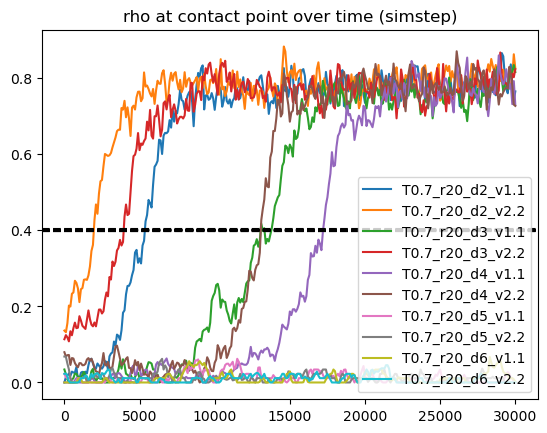

In [353]:
# sims = ["T0.7_r20_d2_v1.1"]

for simdir in sims:


    [T, r, dInital, v1v2] =  re.findall(r"[-+]?(?:\d*\.*\d+)", simdir)
    # re.findall(r"[-+]?(?:\d*\.*\d+)", "Current Level: -13.2db or 14.2 or 3")


    print('------------------')
    print(f'directory: {simdir}')

    dirList = os.listdir(simdir)
    coalSamplingFiles = [f for f in dirList if f.startswith('coalSampling_')]
    # print(dirList)
    if len(coalSamplingFiles) == 0:
        print(f'no relevant files found in directory {simdir}.')
    else:
        coalSamplingFiles = sorted(coalSamplingFiles)
        if len(coalSamplingFiles) > 1:
            print(f'{len(coalSamplingFiles)} files beginning with "coalSampling_" found in dir {simdir}. Using first file, named {coalSamplingFiles[0]}')
        


        # load and transpose DataFrame
        caolSamplePath = os.path.join(simdir, coalSamplingFiles[0])
        rhoDF = pd.read_csv(caolSamplePath, delimiter='\s+')   #  index (rows)= simstep;  colums = y-coordinate  
        rhoDF.set_index('simstep', drop = True, inplace= True)
        rhoDF = rhoDF.transpose()
        rhoDF.index = rhoDF.index.map(float)
        


        # calculating rhoLiq & rhoVap:
        rhoDF_rolling = rhoDF.rolling(window = 20, center = True, axis='rows').mean()
        idDropcenter1Approx = (int) (len(rhoDF)/3)
        idDropcenter2Approx = (int) (2*len(rhoDF)/3)
        rhoLiq = np.mean([rhoDF_rolling.iloc[idDropcenter1Approx].mean(), rhoDF_rolling.iloc[idDropcenter2Approx].mean()])

        rhoDF_rolling = rhoDF.rolling(window = 3, center = True, axis='rows').mean()
        rhoVap = np.mean([rhoDF_rolling.iloc[1].mean(), rhoDF_rolling.iloc[-2].mean()])
        rhoGibbs = (rhoLiq+rhoVap)/2

        print(f'{simdir}: rhoLiq  = {rhoLiq}, rhoVap = {rhoVap}, rhoGibbs = {rhoGibbs}')


        





        # plot of rho on y-axis for each sim
        showplot = False
        # showplot = True
        if(showplot):
            rhoDF_plot = rhoDF.rolling(window = 3, center = True, axis='rows').mean()
            rhoDF_plot.plot(legend=False)
            plt.axhline(y=rhoLiq, color='k', linestyle='--')
            plt.axhline(y=rhoVap, color='k', linestyle='--')
            plt.axhline(y=(rhoLiq+rhoVap)/2, color='k', linestyle='--')
            plt.grid()
            plt.show()



    
        # plot of development of rho in contact point
        rhoDF_rolling = rhoDF.rolling(window = 7, center = True, axis='rows').mean()
        idSymPlane = (int) (len(rhoDF)/2)

        rhoY_symPlane = rhoDF_rolling.iloc[idSymPlane]

        #####criterion: first simstep, where rho>rhoGibbs
        # stepsWithContact= (rhoY_symPlane>rhoGibbs)[rhoY_symPlane>rhoGibbs]
        # if(len(stepsWithContact)==0):
        #     touch = float('nan')
        # else:
        #     touch =stepsWithContact.index.tolist()[0]
         
        ####criterion: last simstep, where spheres don't touch
        mask = rhoY_symPlane>rhoGibbs
        touch = mask[mask==False].index[-1] +5

        showplot = False
        # showplot = True
        if(showplot):
            plt.plot(touch,dInital,'o', label = simdir) 
            print(rhoDF.index[-1])
            plt.axvline(x= rhoDF.columns[-1], color = 'k')
            plt.grid()
            plt.legend()
            plt.title('d_inital over simstep of first touch')
            plt.savefig('d_inital_over_simstepOfTouch')


        # plot of development of rho in contact point
        showplot = False
        showplot = True
        if(showplot):
            plt.axhline(y=(rhoLiq+rhoVap)/2, color = 'k', linestyle='--')
            plt.plot(rhoDF_rolling.iloc[idSymPlane], label = simdir)
            plt.grid()
            plt.legend(loc = 'lower right')
            plt.title('rho at contact point over time (simstep)')
            plt.savefig('rhoContact_over_time')

plt.show()



# Symmetry Plane Visualization

- einlesen der Bilder & Video erstellen in separaten Skript.

In [4]:
dirList = os.listdir('.')
folders = [f for f in dirList if os.path.isdir(f)]
sims = [f for f in folders if f.startswith('T')]
sims.sort()
print(sims)

['T0.7_r20_d2_v1.1', 'T0.7_r20_d2_v2.2', 'T0.7_r20_d3_v1.1', 'T0.7_r20_d3_v2.2', 'T0.7_r20_d4_v1.1', 'T0.7_r20_d4_v2.2', 'T0.7_r20_d5_v1.1', 'T0.7_r20_d5_v2.2', 'T0.7_r20_d6_v1.1', 'T0.7_r20_d6_v2.2']


In [ ]:
### Video generator:


#%%
import os
from site import execsitecustomize
import numpy as np
import pandas as pd
import sys

import math

import matplotlib.pyplot as plt
import csv
import re

import seaborn as sns

import imageio
import matplotlib.cm as cm
import matplotlib.animation as animation

## Video rendering:
def makeVid(imgList, outpath, fps = 2):
    frames = [] # for storing the generated images
    fig = plt.figure()
    for i in range(len(imgList)):
        frames.append([plt.imshow(imgList[i], cmap=cm.Greys_r,animated=True)])

    anim = animation.ArtistAnimation(fig, frames, interval=50, blit=True,
                                    repeat_delay=1000)
    

    f = os.path.normpath(f'{outpath}.mp4')
    writergif = animation.PillowWriter(fps=fps) 
    writervideo = animation.FFMpegWriter(fps=fps) 
    # anim.save(f, writer=writergif)
    # anim.save(f)
    anim.save(f, writer=writervideo)
    plt.close() 
    return



## get directories in img folder:
dirList = os.listdir('./img/')
folders = [f for f in dirList if os.path.isdir(f)]
imgDirList = [f for f in folders if f.startswith('T')]
imgDirList.sort()
print(imgDirList)


fps = 4
vidFolder = os.path.normpath('./video/')
if not os.path.exists(vidFolder): os.mkdir(vidFolder)

for imgDir in imgDirList:





In [9]:
sims = ["T0.7_r20_d4_v1.1"]

showImages = False
saveImages = True
generateVideo = False

imgFolder = os.path.normpath('./img/')
vidFolder = os.path.normpath('./video/')

if not os.path.exists(imgFolder): os.mkdir(imgFolder)
if not os.path.exists(vidFolder): os.mkdir(vidFolder)


for simdir in sims:
    print(f'directory: {simdir}')
    imgSubFolder = os.path.join(imgFolder,f"{simdir}_symPlaneRho/")
    if ((saveImages or generateVideo) and (not os.path.exists(imgSubFolder))): os.mkdir(imgSubFolder)

    dirList = os.listdir(simdir)
    SPsamples = [f for f in dirList if 'CuboidSampling_TS' in f]
    # print(dirList)
    if len(SPsamples) == 0:
        print(f'no relevant files found in directory {simdir}.')
    else:
        SPsamples = sorted(SPsamples)
        maxTimeStep =  int(re.findall(r'\d+', SPsamples[-1])[0])
        print(f'max timestep = {maxTimeStep}')

        print(f"folder: {simdir}")

        # scalarSamples = [scalarSamples[1]]

        postprocList = [] #list of dicts
        imgList = [] #list of plot imgs for video 
        for sample in SPsamples:
            
            # sample = scalarSamples[-1]
            timeStep = int(re.findall(r'\d+', sample)[0]) 
            samplePath = os.path.join(simdir, sample)
            sampledf = pd.read_csv(samplePath, delimiter='\s+')
            #rx, rz, numParts, rho, T, ekin, p, T_r, T_y, T_t, v_r, v_y, v_t, p_r, p_y, p_t, numSamples

            heatmapDF = sampledf.pivot(index='rx', columns='rz', values='rho')
            print(f't = {timeStep}')
            ax = sns.heatmap(heatmapDF,annot=True, square=True, vmin=0, vmax=3)
            ax.set_title(f'Desity at y=0, t = {timeStep}')

            # perform chosen image output:
            imgFileName = f'{simdir}_{str(timeStep).zfill(7)}.jpg'
            if(saveImages or generateVideo): 
                plt.savefig(os.path.join(imgSubFolder,imgFileName))
            if(generateVideo): 
                imgList.append(imageio.imread(os.path.join(imgSubFolder,imgFileName)))
            if(showImages): plt.show()

            plt.close()
            
            postprocList.append(heatmapDF)


    
    # perform video output, if chosen:
    if(generateVideo): makeVid(imgList, f'{simdir}', fps = 4)


# postprocDF.to_csv("postprocessing_data.csv", sep = ',')
# print('done.')


            

    




directory: T0.7_r20_d4_v1.1
max timestep = 30000
folder: T0.7_r20_d4_v1.1
t = 0
t = 100
t = 200
t = 300
t = 400
t = 500
t = 600
t = 700
t = 800
t = 900
t = 1000
t = 1100
t = 1200
t = 1300
t = 1400
t = 1500
t = 1600
t = 1700
t = 1800
t = 1900
t = 2000
t = 2100
t = 2200
t = 2300
t = 2400
t = 2500
t = 2600
t = 2700
t = 2800
t = 2900
t = 3000
t = 3100
t = 3200
t = 3300
t = 3400
t = 3500
t = 3600
t = 3700
t = 3800
t = 3900
t = 4000
t = 4100
t = 4200
t = 4300
t = 4400
t = 4500
t = 4600
t = 4700
t = 4800
t = 4900
t = 5000
t = 5100
t = 5200
t = 5300
t = 5400
t = 5500
t = 5600
t = 5700
t = 5800
t = 5900
t = 6000
t = 6100
t = 6200
t = 6300
t = 6400
t = 6500
t = 6600
t = 6700
t = 6800
t = 6900
t = 7000
t = 7100
t = 7200
t = 7300
t = 7400
t = 7500
t = 7600
t = 7700
t = 7800
t = 7900
t = 8000
t = 8100
t = 8200
t = 8300
t = 8400
t = 8500
t = 8600
t = 8700
t = 8800
t = 8900
t = 9000
t = 9100
t = 9200
t = 9300
t = 9400
t = 9500
t = 9600
t = 9700
t = 9800
t = 9900
t = 10000
t = 10100
t = 10200
t = 1030

# Trash

In [ ]:
df = pd.DataFrame(pd.Series(range(0,5,1)), columns=['num'])
print(df)
print('---')

def approxIndexRow(df, approxIndex):
    return abs(df.index.to_series()-approxIndex).idxmin()
    
print(approxIndexRow(df, 2.6))

   num
0    0
1    1
2    2
3    3
4    4
---
3


In [ ]:
# ##########################
#         rhoDF = sampledf.pivot(index='radius', columns='height', values='rho')
#         # heatmapUpper = heatmapDF.copy(deep = True).iloc[::-1]
#         # print(rhoDF)
#         rho = rhoDF.iloc[[0, 1, 2, 3, 4,5,6,7]].sum()
#         rhoRollingNarrow = rho.rolling(window = 3, center = True).mean()
#         rhoRollingWide = rho.rolling(window = 8, center = True).mean()
#         rhoMax = rhoRollingWide.max()
#         rhoGibbs = rhoMax/2
        
#         domainHeight = rho.index.max()
#         # print(f'rho: \n {rho}')
#         # print('------------')
#         # print(f'idmax: {rho.idxmax()}')
#         # print('------------')
#         rhoLeft = rho[rho.index < domainHeight/2]
#         rhoRight = rho[rho.index >= domainHeight/2]

#         leftMaxId = rhoLeft.idxmax()
#         rightMaxId = rhoRight.idxmax()
#         print(f'left: {leftMaxId}, right: {rightMaxId}')
#         rhoCentral = rho[((rho.index >= leftMaxId)  & (rho.index <= rightMaxId))]

#         rhoGapId = rhoCentral[rhoCentral < rhoGibbs].index
#         gapId = [rhoGapId.min(), rhoGapId.max()]
#         d = gapId[1]-gapId[0]

#         if( (d==0 or math.isnan(d))   and not touch):
#             touch = True
#             print("TOUCH")



#         # print(rhoDF)
#         print(f't = {timeStep}')
#         print(f'd = {d}')

#         # plotting
#         fig, ax = plt.subplots()
#         # ax = rho.plot()
#         # ax = rhoRollingNarrow.plot()
#         # ax = rhoRollingWide.plot()
#         ax = rhoLeft.plot()
#         ax = rhoRight.plot()
#         ax = rhoCentral.plot()
#         plt.hlines(y=[rhoMax/2, rhoMax], xmin=0, xmax=60, colors = 'red',linestyles='--')
#         plt.hlines(y=rhoCentral.min(), xmin=0, xmax=60, colors = 'red',linestyles='--')
#         plt.vlines(x=gapId, ymin = 0, ymax = rho[leftMaxId], colors = 'grey',linestyles='--')
#         plt.show()


In [13]:







#  MOVED TO dataScrap.py FOR FASTER EXECUTION ON STIRLING.


# dirList = os.listdir('.')
# folders = [f for f in dirList if os.path.isdir(f)]
# sims = [f for f in folders if f.startswith('T')]

# # sims = ["T0.7_r6_d2", "T0.7_r6_d4"]




            


# postprocList = [] #list of dicts
# for simdir in sims:
#     integerList = list(map(float, re.findall(r'[0-9,-.]+', simdir)))
#     T = integerList[0]
#     r = integerList[1]
#     d_initial = integerList[2]

#     print(f'directory: {simdir}, T={T}, r={r}, d={d_initial}')

#     dirList = os.listdir(simdir)
#     scalarSamples = [f for f in dirList if 'CylindricSampling' in f]
#     # print(dirList)
#     if len(scalarSamples) == 0:
#         print(f'no relevant files found in directory {simdir}.')
#     else:
#         scalarSamples = sorted(scalarSamples)
#         maxTimeStep =  int(re.findall(r'\d+', scalarSamples[-1])[0])
#         print(f'max timestep = {maxTimeStep}')

#         print(f"folder: {simdir}")


#         # scalarSamples = [scalarSamples[1]]
#         sampledf = pd.read_csv(os.path.join(simdir, scalarSamples[0]), delimiter='\s+')
#         rhoDF_fistSample = sampledf.pivot(index='radius', columns='height', values='rho').iloc[[0, 1, 2, 3, 4]].sum()
#         rhoLiq = rhoDF_fistSample.rolling(window = 8, center = True).mean().max()
#         print(f'calculated liquid density: {rhoLiq}')
#         rhoGibbs = rhoLiq/2    
#         domainHeight = rhoDF_fistSample.index.max()

#         # dataDict = {'T':[], 'r':[],'d_init':[], 't':[], 'd':  []}
#         for sample in scalarSamples:
#             # print(f'extracting data from sample {sample}')
#             timeStep = int(re.findall(r'\d+', sample)[0]) 

#             samplePath = os.path.join(simdir, sample)
#             sampledf = pd.read_csv(samplePath, delimiter='\s+')
#             #  height,  radius, numParts, rho, T,   ekin, p,  T_r,   T_y, T_t,   v_r,   v_y, v_t, p_r, p_y,     p_t, numSamples

#             rhoDF = sampledf.pivot(index='radius', columns='height', values='rho')
#             rho = rhoDF.iloc[[0, 1, 2, 3, 4]].sum() #series of rho with index y
#             # rhoRollingNarrow = rho.rolling(window = 3, center = True).mean()
#             # rhoRollingWide = rho.rolling(window = 8, center = True).mean()

#             # print(f'rho: \n {rho}')
#             # print('------------')
#             # print(f'idmax: {rho.idxmax()}')
#             # print('------------')

#             rightMaxId = rho[rho.index >= domainHeight/2].idxmax()
#             leftMaxId = rho[rho.index < domainHeight/2].idxmax()
#             # # print(f'left: {leftMaxId}, right: {rightMaxId}')
#             # rhoCentral = rho[((rho.index >= leftMaxId)  & (rho.index <= rightMaxId))]

#             gapY = rho[((rho.index >= leftMaxId)  & (rho < rhoGibbs) & (rho.index <= rightMaxId))].index
#             gapLimitsY = [gapY.min(), gapY.max()]
#             d = gapY.max() - gapY.min()  
#             if math.isnan(d):
#                 d = 0.

#             # if( d==0):
#             #     print(f"touching at t ={timeStep}")
#             sampleDict = {'T':T, 'r':r,'d_init':d_initial, 't':timeStep, 'd': d}

#             # dataDict['T'].append(T)
#             # dataDict['r'].append(r)
#             # dataDict['d_init'].append(d_initial)
#             # dataDict['t'].append(timeStep)
#             # dataDict['d'].append(d)

#             print(f'data for sample {sample}: {sampleDict}')
#             postprocList.append(sampleDict)


# postprocDF = pd.DataFrame(postprocList)
# # print(postprocDF)
# postprocDF.to_csv("postprocessing_data.csv", sep = ',')
# print('done.')


In [1]:
postprocDF = pd.read_csv(os.path.abspath('postprocessing_dataScrap.csv'), sep=',', skipinitialspace=True) #, sep=';'

fig, ax = plt.subplots(figsize=(8,6))

postprocDF.set_index('t', inplace=True)
postprocDF.groupby('d_init')['d'].plot(ax = ax, legend = True , title = 'd over time for different initial distances at temperature T =..')
plt.grid(True)

NameError: name 'pd' is not defined

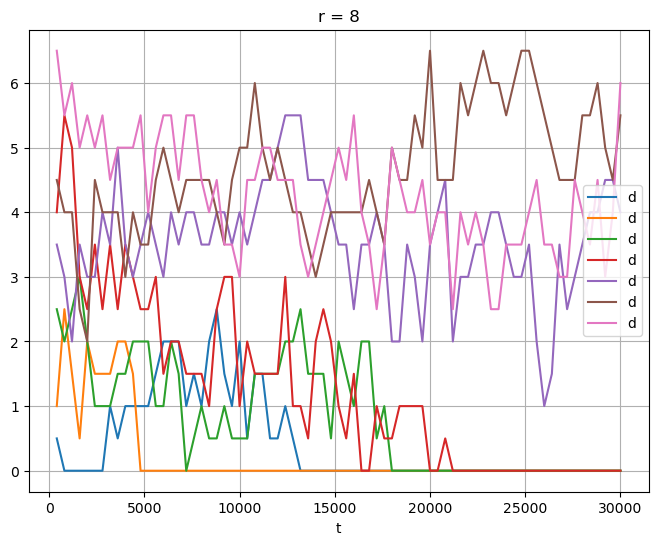

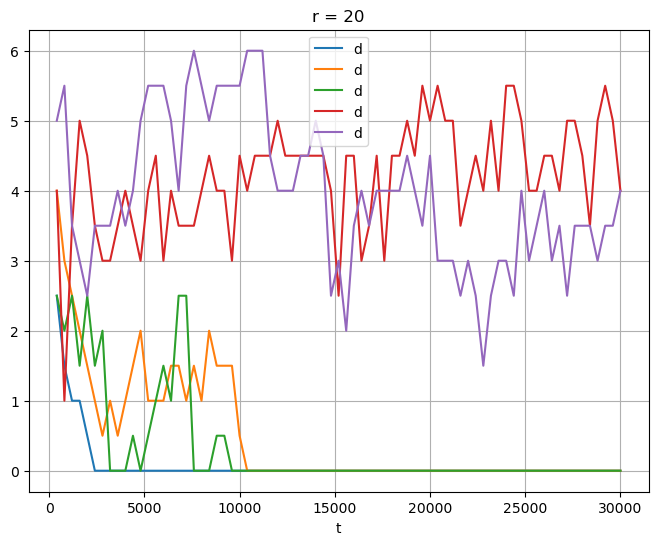

In [52]:
postprocDF = pd.read_csv(os.path.abspath('postprocessing_dataScrap.csv'), sep=',', skipinitialspace=True) #, sep=';'

radii = [8,20]
for r in radii:
    fig, ax = plt.subplots(figsize=(8,6))
    postprocDF[postprocDF['r'] == r].groupby('d_init').plot(x = 't',y = 'd', ax=ax, title =f'r = {r}')
    plt.grid(True)
    plt.show()

    Unnamed: 0           dir    T     r  d_init  n   d0   tTouch
0            0  T0.7_r8_d3.5  0.7   8.0     3.5  0  0.0    400.0
1            1   T0.7_r20_d2  0.7  20.0     2.0  0  0.0    400.0
2            2   T0.7_r20_d5  0.7  20.0     5.0  0  4.5      NaN
3            3   T0.7_r20_d6  0.7  20.0     6.0  0  0.0    400.0
4            4    T0.7_r8_d6  0.7   8.0     6.0  0  0.0    400.0
5            5  T0.7_r8_d4.5  0.7   8.0     4.5  0  0.0    400.0
6            6  T0.7_r8_d2.5  0.7   8.0     2.5  0  0.0    400.0
7            7  T0.7_r8_d5.5  0.7   8.0     5.5  0  3.5  12400.0
8            8   T0.7_r20_d3  0.7  20.0     3.0  0  4.0  10400.0
9            9   T0.7_r20_d4  0.7  20.0     4.0  0  2.5   3600.0
10          10    T0.7_r8_d4  0.7   8.0     4.0  0  0.0    400.0
11          11    T0.7_r8_d5  0.7   8.0     5.0  0  3.5      NaN


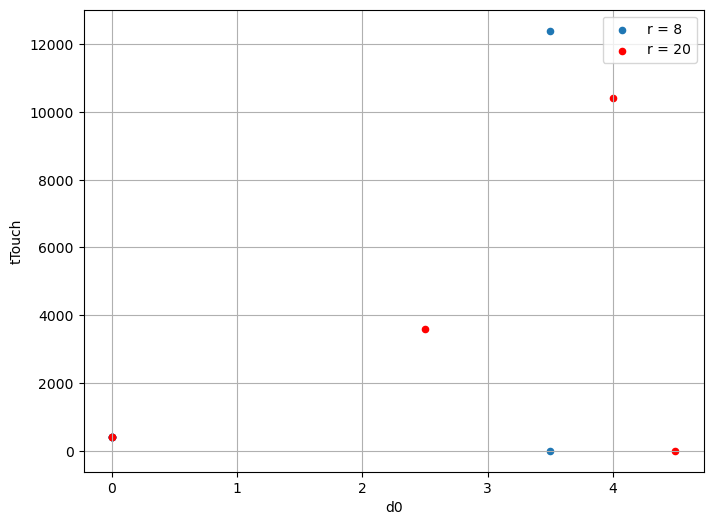

In [63]:
# postprocDF = pd.read_csv(os.path.abspath('postprocessing_dataScrap.csv'), sep=',', skipinitialspace=True) #, sep=';'

# firstTouchDF = postprocDF.loc[postprocDF['firstTouch'] == True]

# print(firstTouchDF)
# # fig, ax = plt.subplots(figsize=(8,6))
# 
# ax = firstTouchDF.plot.scatter('d_init', 't')



firstTouchDF = pd.read_csv(os.path.abspath('postprocessing_contactDF.csv'), sep=',', skipinitialspace=True) #, sep=';'
print(firstTouchDF)
firstTouchDF = firstTouchDF.fillna(0)

fig, ax = plt.subplots(figsize=(8,6))
ax = firstTouchDF[firstTouchDF['r']==8].plot.scatter(x = 'd0', y = 'tTouch', ax=ax, label = 'r = 8')
ax = firstTouchDF[firstTouchDF['r']==20].plot.scatter(x = 'd0', y = 'tTouch', ax=ax, label = 'r = 20', color = 'r')
plt.grid(True)

# postprocDF.set_index('t', inplace=True)
# postprocDF.groupby('d_init')['d'].plot(ax = ax, legend = True , title = 'd over time for different initial distances at temperature T =..')

In [38]:
# import pandas as pd



# df = pd.DataFrame({'A':[1,2,4], 'B':[3,4,6]}, index = [1,10, 20])


# print(df)
# df.iloc[0]*1.34
# print(df)

# df.mul(df.index*2.4, axis=0)


In [62]:
simdir = 'T0.7_r20_d4'

integerList = list(map(float, re.findall(r'[0-9,-.]+', simdir)))
T = integerList[0]
r = integerList[1]
d_initial = integerList[2]
if len(integerList) > 3: # legacy compatability
    n = integerList[3]
else: 
    n = 0

print(f'directory: {simdir}, T={T}, r={r}, d={d_initial}')

dirList = os.listdir(simdir)
scalarSamples = [f for f in dirList if 'CylindricSampling' in f]
# print(dirList)
if len(scalarSamples) == 0:
    print(f'no relevant files found in directory {simdir}.')
else:
    scalarSamples = sorted(scalarSamples)
    maxTimeStep =  int(re.findall(r'\d+', scalarSamples[-1])[0])
    print(f'max timestep = {maxTimeStep}')

    print(f"folder: {simdir}")


    # scalarSamples = [scalarSamples[1]]
    sampledf = pd.read_csv(os.path.join(simdir, scalarSamples[0]), delimiter='\s+')
    rhoDF_fistSample = sampledf.pivot(index='radius', columns='height', values='rho').iloc[[0, 1, 2, 3, 4, 5, 6, 7]].sum()

    print('::::::rhoDF_fistSample:')
    print(rhoDF_fistSample)

    print('::::::rolling.mean:')
    print(rhoDF_fistSample.rolling(window = 2, center = True).mean())


    print('::::::max:')
    print(rhoDF_fistSample.rolling(window = 2, center = True).mean().max())

    rhoLiq = rhoDF_fistSample.rolling(window = 2, center = True).mean().max()
    print(f'calculated liquid density: {rhoLiq}')

directory: T0.7_r20_d4, T=0.7, r=20.0, d=4.0
max timestep = 30000
folder: T0.7_r20_d4
::::::rhoDF_fistSample:
height
0.25     0.000000
0.75     0.018250
1.25     0.615007
1.75     0.031074
2.25     0.010417
           ...   
89.75    0.621182
90.25    0.415511
90.75    0.155760
91.25    0.043290
91.75    0.000000
Length: 184, dtype: float64
::::::rolling.mean:
height
0.25          NaN
0.75     0.009125
1.25     0.316629
1.75     0.323041
2.25     0.020746
           ...   
89.75    0.609300
90.25    0.518346
90.75    0.285635
91.25    0.099525
91.75    0.021645
Length: 184, dtype: float64
::::::max:
7.404688232211542
calculated liquid density: 7.404688232211542


In [ ]:

                
        from numpy.fft import fft
        smallRhoDF =rhoDF.loc[1000]
        smallRhoDF = smallRhoDF[60:180] - smallRhoDF[60:180].mean()
        plt.plot(smallRhoDF)
        plt.show()
        print(fft(smallRhoDF))
        fftData = fft(smallRhoDF)
        plt.plot(fftData[0:(int)(len(fftData)/2)])
        plt.grid()



